### Load Sudoku2 dataset

In [ ]:
import numpy as np

#images = np.load('/content/drive/MyDrive/Sudoko Dataset Task 2/Train/imgs.npy')
labels = np.load('/content/drive/MyDrive/Sudoko Dataset Task 2/Train/labels.npy')
images_test = np.load('/content/drive/MyDrive/Sudoko Dataset Task 2/Test/imgs.npy')


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.nn.functional import one_hot
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
image_reader = torch.load('model.pt')

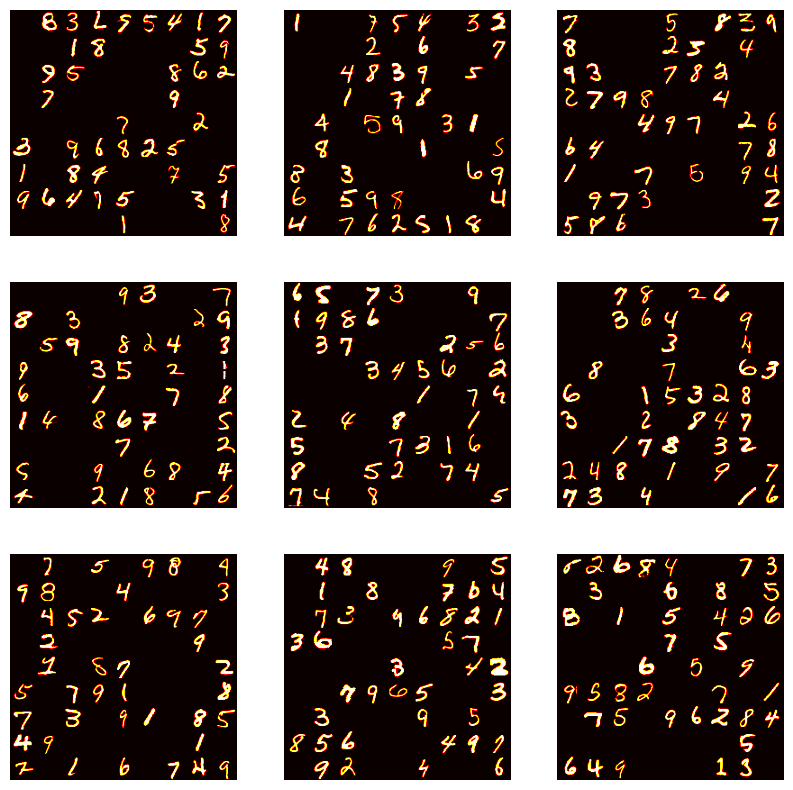

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='hot')
    plt.axis('off')

plt.show()

In [ ]:
images.shape

(50000, 252, 252)

Converting images and labels to array

In [ ]:
sudoko_grid = np.zeros((50000,9,9),dtype=np.int16)

for n in range(50000):
  #print(img.shape)
  for  i in range(9):
    for j in range(9):

      inp = torch.tensor(images[n, i * 28 : (i + 1) * 28 , j * 28 : (j + 1) * 28]).reshape((1,28*28))
      out = image_reader(inp.float())
      sudoko_grid[n,i,j] = torch.argmax(out).item()
      #print(torch.argmax(out).item())
  #break

In [ ]:
np.save('images_grid.npy', sudoko_grid)

In [ ]:
sudoko_grid_label = np.zeros((50000,9,9),dtype=np.int16)

for n in range(50000):
  #print(img.shape)
  for  i in range(9):
    for j in range(9):

      inp = torch.tensor(labels[n, i * 28 : (i + 1) * 28 , j * 28 : (j + 1) * 28]).reshape((1,28*28))
      out = image_reader(inp.float())
      sudoko_grid_label[n,i,j] = torch.argmax(out).item()
      #print(torch.argmax(out).item())
  #break

In [ ]:
np.save('labels_grid.npy', sudoko_grid_label)

In [ ]:
sudoko_test_grid = np.zeros((10000,9,9),dtype=np.int16)

for n in range(10000):
  #print(img.shape)
  for  i in range(9):
    for j in range(9):

      inp = torch.tensor(images_test[n, i * 28 : (i + 1) * 28 , j * 28 : (j + 1) * 28]).reshape((1,28*28))
      out = image_reader(inp.float())
      sudoko_test_grid[n,i,j] = torch.argmax(out).item()
      #print(torch.argmax(out).item())
  #break

In [ ]:
np.save('images_test_grid.npy', sudoko_test_grid)